In [39]:
import pandas as pd
import shapefile as shp 
import geopandas as gpd 
import matplotlib.pyplot as plt
import numpy as np

In [36]:
# Read the shapefile into a GeoPandas DataFrame
geo = gpd.read_file('BR_Municipios_2021/BR_Municipios_2021.shp')

geo['geometry'] = geo['geometry']
geo['attributes'] = geo.drop('geometry', axis=1).apply(lambda x: x.to_dict(), axis=1)
geo.CD_MUN = geo.CD_MUN.astype(int)
geo.head()

df = pd.read_csv('muni_ids.csv', header= 0, index_col = 0)
munis = df['0'].values

geo = geo[geo.CD_MUN.isin(munis)]

In [37]:
geo.head()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry,attributes
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8...","{'CD_MUN': '1100015', 'NM_MUN': 'Alta Floresta..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736...","{'CD_MUN': '1100023', 'NM_MUN': 'Ariquemes', '..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3...","{'CD_MUN': '1100031', 'NM_MUN': 'Cabixi', 'SIG..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3...","{'CD_MUN': '1100049', 'NM_MUN': 'Cacoal', 'SIG..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0...","{'CD_MUN': '1100056', 'NM_MUN': 'Cerejeiras', ..."


In [38]:
gdf = gpd.GeoDataFrame(geo.geometry)

<function matplotlib.pyplot.show(close=None, block=None)>

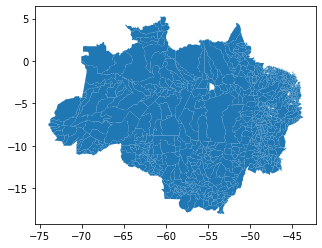

In [40]:
gdf.plot()
plt.show()

In [41]:
xmin, ymin, xmax, ymax = geo.geometry.total_bounds

# Calculate the length and width in kilometers
length_km = (xmax - xmin) * 111.32  # Approximate length conversion (degrees to kilometers)
width_km = (ymax - ymin) * 111.32   # Approximate width conversion (degrees to kilometers)

# Print the length and width
print("Length in kilometers:", length_km)
print("Width in kilometers:", width_km)

Length in kilometers: 3365.9415003161175
Width in kilometers: 2595.2520647684332


In [42]:
np.mean(geo.AREA_KM2)

6743.379447439352

In [49]:
import math

# Dimensions of the original rectangle
length = 3365.9415003161175
width = 2595.2520647684332

# Target area for each smaller rectangle
target_area = 6743.379447439352

# Calculate the number of cuts along the length
cuts_length = math.isqrt(round(length * width / target_area))

# Calculate the number of cuts along the width
cuts_width = math.isqrt(round(width * length / target_area))

# Print the number of cuts along the length and width
print("Number of cuts along the length:", cuts_length)
print("Number of cuts along the width:", cuts_width)


Number of cuts along the length: 35
Number of cuts along the width: 35


In [52]:
(3365.9415003161175/36) * (2595.2520647684332/36)

6740.329188723118